
## **Analytic Hierarchy Process (AHP)**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### The example of AHP using Python (the task, explanations, figures in markdown cells are taken from [Analytic hierarchy process – leader example](https://en.wikipedia.org/wiki/Analytic_hierarchy_process_–_leader_example) (From Wikipedia, the free encyclopedia))

This example describes the use of the AHP in choosing a leader for a company whose founder is about to retire. There are several competing candidates and several competing criteria for choosing the most suitable one. By using the AHP, the board of directors is able to choose the best candidate in a rational, transparent way that can be examined and understood by all concerned.

The three candidates are Tom, Dick, and Harry. Summaries of their backgrounds are shown below:

![Image](https://upload.wikimedia.org/wikipedia/commons/6/64/AHP_TDHBiographies.png)

The AHP hierarchy for this decision is shown below. As the decision makers continue with the AHP, they will determine priorities for the candidates with respect to each of the decision criteria, and priorities for each of the criteria with respect to their importance in reaching the goal. The priorities will then be combined throughout the hierarchy to give an overall priority for each candidate. The candidate with the highest priority will be the most suitable Alternative, and the ratios of the candidates' priorities will indicate their relative strengths with respect to the Goal.

![Image](https://upload.wikimedia.org/wikipedia/commons/d/db/AHPHierarchy1Labeled.png)





### Pairwise Comparisons and Local Priorities

![Image](https://upload.wikimedia.org/wikipedia/commons/f/f4/AHPFundamentalScaleModerately.png)

![Image](https://upload.wikimedia.org/wikipedia/commons/8/8a/AHP_TDHExperienceGrid.png)
![Image](https://upload.wikimedia.org/wikipedia/commons/4/45/AHP_TDHExperienceMatrix.png)

In [2]:
# pairwice comparison matrix with respect to EXPERIENCE
M_EXPERIENCE = np.array([[1, 1/4, 4],
                         [4, 1, 9],
                         [1/4, 1/9, 1]])    

M_EXPERIENCE

array([[1.        , 0.25      , 4.        ],
       [4.        , 1.        , 9.        ],
       [0.25      , 0.11111111, 1.        ]])

In [3]:
# function for calculating the priority vector and consistency index with given pairwice comparison matrix A
def prior_vec(A):
    
    # L - eigenvalues, v - eigenvectors
    L, v = np.linalg.eig(A)
    
    # eigenvalues can be complex, we calculate absolute values
    abs_L = np.abs(L)
    
    # max eigenvalue
    lambda_max = max(abs_L)

    # eigenvector corresponding to the max eigenvalue
    i = np.argmax(abs_L)
    W = v[:, i]
    w = W/sum(W)
    
    # consistency index
    n = A.shape[0]
    cons_index = (lambda_max - n)/(n - 1)
       
    return cons_index, np.abs(w)

![Image](https://www.researchgate.net/profile/Chutiphon_Srisawat/publication/260210777/figure/tbl1/AS:669374113394697@1536602633519/Average-random-index-RI-based-on-Matrix-Size-8.png)

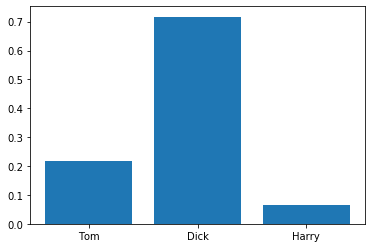

priority vector (EXPERIENCE) [0.2172 0.7171 0.0658]
consistency index (EXPERIENCE) 0.0184
consistency ratio (EXPERIENCE) 0.0355


In [4]:
# priority vector, consistency index, and consistency ratio with respect to EXPERIENCE

# CI - consistency index, y_EXPERIENCE - priority vector
CI, y_EXPERIENCE = prior_vec(M_EXPERIENCE)

# CR - consistency ratio = CI/RI (see above)
CR = CI/0.52

# visualization
labels = ['Tom', 'Dick', 'Harry']

plt.bar(labels, y_EXPERIENCE)
plt.show()

print(f'priority vector (EXPERIENCE) {y_EXPERIENCE.round(4)}')
print(f'consistency index (EXPERIENCE) {CI.round(4)}')
print(f'consistency ratio (EXPERIENCE) {CR.round(4)}')

![Image](https://upload.wikimedia.org/wikipedia/commons/2/29/AHP_TDHEducationGrid.png)
![Image](https://upload.wikimedia.org/wikipedia/commons/7/75/AHP_TDHEducationMatrix.png)

In [5]:
# pairwice comparison matrix with respect to EDUCATION
M_EDUCATION = np.array([[1, 3, 1/5],
                        [1/3, 1, 1/7],
                        [5, 7, 1]])
                          
M_EDUCATION

array([[1.        , 3.        , 0.2       ],
       [0.33333333, 1.        , 0.14285714],
       [5.        , 7.        , 1.        ]])

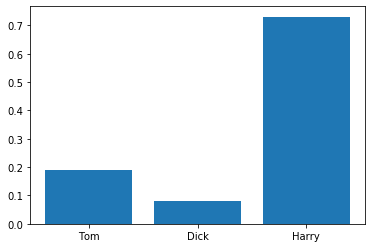

priority vector (EDUCATION) [0.1884 0.081  0.7306]
consistency index (EDUCATION) 0.0324
consistency ratio (EDUCATION) 0.0624


In [6]:
# priority vector, consistency index, and consistency ratio with respect to EDUCATION

# CI - consistency index, y_EDUCATION - priority vector
CI, y_EDUCATION = prior_vec(M_EDUCATION)

# CR - consistency ratio = CI/RI (see above)
CR = CI/0.52

# visualization
plt.bar(labels, y_EDUCATION)
plt.show()

print(f'priority vector (EDUCATION) {y_EDUCATION.round(4)}')
print(f'consistency index (EDUCATION) {CI.round(4)}')
print(f'consistency ratio (EDUCATION) {CR.round(4)}')

![Image](https://upload.wikimedia.org/wikipedia/commons/a/a3/AHP_TDHCharismaGrid.png)
![Image](https://upload.wikimedia.org/wikipedia/commons/d/dc/AHP_TDHCharismaMatrixWPriorities.png)

In [7]:
# pairwice comparison matrix with respect to CHARISMA
M_CHARISMA = np.array([[1, 5, 9],
                       [1/5, 1, 4],
                       [1/9, 1/4, 1]])

M_CHARISMA

array([[1.        , 5.        , 9.        ],
       [0.2       , 1.        , 4.        ],
       [0.11111111, 0.25      , 1.        ]])

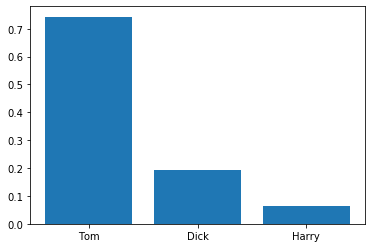

priority vector (CHARISMA) [0.7429 0.1939 0.0633]
consistency index (CHARISMA) 0.0356
consistency ratio (CHARISMA) 0.0685


In [8]:
# priority vector, consistency index, and consistency ratio with respect to CHARISMA

# CI - consistency index, y_CHARISMA - priority vector
CI, y_CHARISMA = prior_vec(M_CHARISMA)

# CR - consistency ratio = CI/RI (see above)
CR = CI/0.52

# visualization
plt.bar(labels, y_CHARISMA)
plt.show()

print(f'priority vector (CHARISMA) {y_CHARISMA.round(4)}')
print(f'consistency index (CHARISMA) {CI.round(4)}')
print(f'consistency ratio (CHARISMA) {CR.round(4)}')

![Image](https://upload.wikimedia.org/wikipedia/commons/6/67/AHP_TDHAgeGrid.png)
![Image](https://upload.wikimedia.org/wikipedia/commons/d/d8/AHP_TDHAgeMatrixWPriorities.png)

In [9]:
# pairwice comparison matrix with respect to AGE
M_AGE = np.array([[1, 1/3, 5],
                  [3, 1, 9],
                  [1/5, 1/9, 1]])
  
M_AGE

array([[1.        , 0.33333333, 5.        ],
       [3.        , 1.        , 9.        ],
       [0.2       , 0.11111111, 1.        ]])

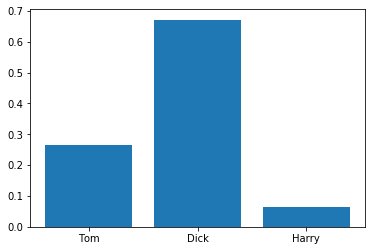

priority vector (AGE) [0.2654 0.6716 0.0629]
consistency index (AGE) 0.0145
consistency ratio (AGE) 0.0279


In [10]:
# priority vector, consistency index, and consistency ratio with respect to AGE

# CI - consistency index, y_AGE - priority vector
CI, y_AGE = prior_vec(M_AGE)

# CR - consistency ratio = CI/RI (see above)
CR = CI/0.52

# visualization
plt.bar(labels, y_AGE)
plt.show()

print(f'priority vector (AGE) {y_AGE.round(4)}')
print(f'consistency index (AGE) {CI.round(4)}')
print(f'consistency ratio (AGE) {CR.round(4)}')

![Image](https://upload.wikimedia.org/wikipedia/commons/c/c4/AHP_TDHCriteriaGrid.png)
![Image](https://upload.wikimedia.org/wikipedia/commons/d/d5/AHP_TDHCriteriaMatrixWPriorities.png)

In [11]:
# pairwice comparison matrix with respect to reaching the Goal
M_GOAL = np.array([[1, 4, 3, 7],
                   [1/4, 1, 1/3, 3],
                   [1/3, 3, 1, 5],
                   [1/7, 1/3, 1/5, 1]])
  
M_GOAL

array([[1.        , 4.        , 3.        , 7.        ],
       [0.25      , 1.        , 0.33333333, 3.        ],
       [0.33333333, 3.        , 1.        , 5.        ],
       [0.14285714, 0.33333333, 0.2       , 1.        ]])

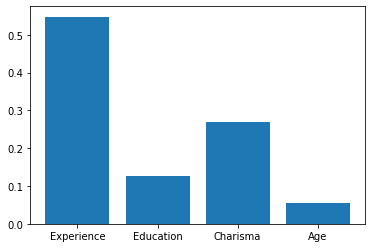

priority vector (reaching the Goal) [0.5476 0.1266 0.2699 0.0559]
consistency index (reaching the Goal) 0.0395
consistency ratio (reaching the Goal) 0.0444


In [12]:
# priority vector, consistency index, and consistency ratio with respect to reaching the Goal

# CI - consistency index, y_GOAL - priority vector
CI, y_GOAL = prior_vec(M_GOAL)

# CR - consistency ratio = CI/RI (see above)
CR = CI/0.89

# visualization
labels = ['Experience', 'Education', 'Charisma', 'Age']

plt.bar(labels, y_GOAL)
plt.show()

print(f'priority vector (reaching the Goal) {y_GOAL.round(4)}')
print(f'consistency index (reaching the Goal) {CI.round(4)}')
print(f'consistency ratio (reaching the Goal) {CR.round(4)}')

### Global Priorities

In [13]:
# matrix, consisting of local priority vectors of alternatives with respect to the EXPERIENCE, EDUCATION, CHARISMA, and AGE 
M_LOCAL = np.vstack ((y_EXPERIENCE, y_EDUCATION, y_CHARISMA, y_AGE)).T

M_LOCAL

array([[0.21716561, 0.1883941 , 0.74286662, 0.26543334],
       [0.71706504, 0.08096123, 0.19388163, 0.67162545],
       [0.06576935, 0.73064467, 0.06325174, 0.06294121]])

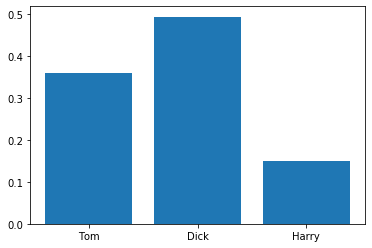

Global priority vector [0.3581 0.4928 0.1491]


In [14]:
# global priority vector
G = M_LOCAL@y_GOAL.T

# visualization
labels = ['Tom', 'Dick', 'Harry']

plt.bar(labels, G)
plt.show()

print(f'Global priority vector {G.round(4)}')

Based on the Board's choice of decision criteria, on their judgments about the relative importance of each, and on their judgments about each candidate with respect to each of the criteria, Dick, with a priority of 0.492, is by far the most suitable candidate. Tom, with a priority of 0.358, is second, and Harry, at 0.149, is third. The Board should choose Dick as the company's new leader.

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Cc.logo.circle.svg/40px-Cc.logo.circle.svg.png)  
available under the [Creative Commons Attribution-ShareAlike License](https://creativecommons.org/licenses/by-sa/3.0/)